# AITT Assignment
## Group 4: Gin & Ethan

In [387]:
# Import the necessary modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [388]:
# Create Dataframes based on all 3 of the datasets
df1 = pd.read_csv("vulnerabilities-dataset-1.csv")
df2 = pd.read_csv("vulnerabilities-dataset-2.csv")
df3 = pd.read_csv("vulnerabilities-dataset-3.csv")

##### Now that we have read the three CSVs, we will merge them into one dataframe.

In [389]:
merged_df = pd.concat([df1, df2, df3], ignore_index=True)


In [390]:
merged_df


,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,notes,grp,pub_date,cvss,cwe,vector,complexity,severity
0,CVE-2021-27104,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-78,NETWORK,LOW,CRITICAL
1,CVE-2021-27102,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,7.8,CWE-78,LOCAL,LOW,HIGH
2,CVE-2021-27101,accellion,FTA,Accellion FTA SQL Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-89,NETWORK,LOW,CRITICAL
3,CVE-2021-27103,accellion,FTA,Accellion FTA SSRF Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-918,NETWORK,LOW,CRITICAL
4,CVE-2021-21017,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Acrobat Reader DC versions versions 2020.013.2...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-11,8.8,CWE-787,NETWORK,LOW,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,CVE-2021-30983,apple,iOS and iPadOS,Apple iOS and iPadOS Buffer Overflow Vulnerabi...,2022-06-27,Apple iOS and iPadOS contain a buffer overflow...,Apply updates per vendor instructions.,2022-07-18,NaN,40,2021-08-24,7.8,CWE-120,LOCAL,LOW,HIGH
2346,CVE-2020-3837,apple,Multiple Products,Apple Multiple Products Memory Corruption Vuln...,2022-06-27,"Apple iOS, iPadOS, macOS, tvOS, and watchOS co...",Apply updates per vendor instructions.,2022-07-18,NaN,40,2020-02-27,7.8,CWE-787,LOCAL,LOW,HIGH
2347,CVE-2020-9907,apple,Multiple Products,Apple Multiple Products Memory Corruption Vuln...,2022-06-27,"Apple iOS, iPadOS, and tvOS contain a memory c...",Apply updates per vendor instructions.,2022-07-18,NaN,40,2020-10-16,7.8,CWE-787,LOCAL,LOW,HIGH
2348,CVE-2019-8605,apple,Multiple Products,Apple Multiple Products Use-After-Free Vulnera...,2022-06-27,"A use-after-free vulnerability in Apple iOS, m...",Apply updates per vendor instructions.,2022-07-18,NaN,40,2019-12-18,7.8,CWE-416,LOCAL,LOW,HIGH


In [391]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cve_id              2350 non-null   object 
 1   vendor_project      2350 non-null   object 
 2   product             2347 non-null   object 
 3   vulnerability_name  2350 non-null   object 
 4   date_added          2350 non-null   object 
 5   short_description   2332 non-null   object 
 6   required_action     2350 non-null   object 
 7   due_date            2350 non-null   object 
 8   notes               1 non-null      object 
 9   grp                 2350 non-null   int64  
 10  pub_date            2327 non-null   object 
 11  cvss                1862 non-null   float64
 12  cwe                 2316 non-null   object 
 13  vector              1862 non-null   object 
 14  complexity          1862 non-null   object 
 15  severity            1862 non-null   object 
dtypes: flo

In [392]:
df = merged_df

In [393]:
# Remove the NaN category.
df = df.drop(columns=['notes'])

In [394]:
# Re-print the dataframe with the updates.
df

,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,grp,pub_date,cvss,cwe,vector,complexity,severity
0,CVE-2021-27104,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,9.8,CWE-78,NETWORK,LOW,CRITICAL
1,CVE-2021-27102,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,7.8,CWE-78,LOCAL,LOW,HIGH
2,CVE-2021-27101,accellion,FTA,Accellion FTA SQL Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,9.8,CWE-89,NETWORK,LOW,CRITICAL
3,CVE-2021-27103,accellion,FTA,Accellion FTA SSRF Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,9.8,CWE-918,NETWORK,LOW,CRITICAL
4,CVE-2021-21017,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Acrobat Reader DC versions versions 2020.013.2...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-11,8.8,CWE-787,NETWORK,LOW,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,CVE-2021-30983,apple,iOS and iPadOS,Apple iOS and iPadOS Buffer Overflow Vulnerabi...,2022-06-27,Apple iOS and iPadOS contain a buffer overflow...,Apply updates per vendor instructions.,2022-07-18,40,2021-08-24,7.8,CWE-120,LOCAL,LOW,HIGH
2346,CVE-2020-3837,apple,Multiple Products,Apple Multiple Products Memory Corruption Vuln...,2022-06-27,"Apple iOS, iPadOS, macOS, tvOS, and watchOS co...",Apply updates per vendor instructions.,2022-07-18,40,2020-02-27,7.8,CWE-787,LOCAL,LOW,HIGH
2347,CVE-2020-9907,apple,Multiple Products,Apple Multiple Products Memory Corruption Vuln...,2022-06-27,"Apple iOS, iPadOS, and tvOS contain a memory c...",Apply updates per vendor instructions.,2022-07-18,40,2020-10-16,7.8,CWE-787,LOCAL,LOW,HIGH
2348,CVE-2019-8605,apple,Multiple Products,Apple Multiple Products Use-After-Free Vulnera...,2022-06-27,"A use-after-free vulnerability in Apple iOS, m...",Apply updates per vendor instructions.,2022-07-18,40,2019-12-18,7.8,CWE-416,LOCAL,LOW,HIGH


In [395]:
# Check basic information regarding the dataset.
df.describe()

,grp,cvss
count,2350.000000,1862.000000
mean,13.742553,8.410258
std,12.467945,1.304074
min,1.000000,3.100000
25%,1.000000,7.800000
50%,16.000000,8.800000
75%,20.000000,9.800000
max,41.000000,10.000000


#### From the above .describe(), we can tell that there are 2351 total rows but only 1870 of them have values for the CVSS column. We need to drop the ones without their CVSS defined so our model can effectively predict and show us relevant results.

In [396]:
df = df.drop_duplicates()
df = df.dropna()
df = df[df["cvss"] != "NA"]
df


,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,grp,pub_date,cvss,cwe,vector,complexity,severity
0,CVE-2021-27104,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,9.8,CWE-78,NETWORK,LOW,CRITICAL
1,CVE-2021-27102,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,7.8,CWE-78,LOCAL,LOW,HIGH
2,CVE-2021-27101,accellion,FTA,Accellion FTA SQL Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,9.8,CWE-89,NETWORK,LOW,CRITICAL
3,CVE-2021-27103,accellion,FTA,Accellion FTA SSRF Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,9.8,CWE-918,NETWORK,LOW,CRITICAL
4,CVE-2021-21017,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Acrobat Reader DC versions versions 2020.013.2...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-11,8.8,CWE-787,NETWORK,LOW,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,CVE-2020-3837,apple,Multiple Products,Apple Multiple Products Memory Corruption Vuln...,2022-06-27,"Apple iOS, iPadOS, macOS, tvOS, and watchOS co...",Apply updates per vendor instructions.,2022-07-18,40,2020-02-27,7.8,CWE-787,LOCAL,LOW,HIGH
1560,CVE-2020-9907,apple,Multiple Products,Apple Multiple Products Memory Corruption Vuln...,2022-06-27,"Apple iOS, iPadOS, and tvOS contain a memory c...",Apply updates per vendor instructions.,2022-07-18,40,2020-10-16,7.8,CWE-787,LOCAL,LOW,HIGH
1561,CVE-2019-8605,apple,Multiple Products,Apple Multiple Products Use-After-Free Vulnera...,2022-06-27,"A use-after-free vulnerability in Apple iOS, m...",Apply updates per vendor instructions.,2022-07-18,40,2019-12-18,7.8,CWE-416,LOCAL,LOW,HIGH
1562,CVE-2018-4344,apple,Multiple Products,Apple Multiple Products Memory Corruption Vuln...,2022-06-27,"Apple iOS, macOS, tvOS, and watchOS contain a ...",Apply updates per vendor instructions.,2022-07-18,40,2019-04-03,7.8,CWE-119,LOCAL,LOW,HIGH


In [397]:
df.describe()
# as these values now show that the count for both columns are the same, it shows that we have successfully dropped all NA values from df.

,grp,cvss
count,640.000000,640.000000
mean,11.920312,8.401563
std,12.422463,1.305075
min,1.000000,3.100000
25%,1.000000,7.800000
50%,6.000000,8.800000
75%,19.000000,9.800000
max,41.000000,10.000000


In [398]:
# To complete data cleaning, we will drop all columns which will not be used for the assignment.
df_clean = df[['product','vector','cvss','complexity']]
df_clean
#df_clean is the dataframe we will use for the next parts of the assignment.

,product,vector,cvss,complexity
0,FTA,NETWORK,9.8,LOW
1,FTA,LOCAL,7.8,LOW
2,FTA,NETWORK,9.8,LOW
3,FTA,NETWORK,9.8,LOW
4,Acrobat and Reader,NETWORK,8.8,LOW
...,...,...,...,...
1559,Multiple Products,LOCAL,7.8,LOW
1560,Multiple Products,LOCAL,7.8,LOW
1561,Multiple Products,LOCAL,7.8,LOW
1562,Multiple Products,LOCAL,7.8,LOW


In [399]:
df_clean.describe()

,cvss
count,640.000000
mean,8.401563
std,1.305075
min,3.100000
25%,7.800000
50%,8.800000
75%,9.800000
max,10.000000


In [400]:
df_clean.dtypes
# Checking the types of the data in the new df to ensure that they are correct.

product        object
vector         object
cvss          float64
complexity     object
dtype: object

In [401]:
#Previewing the dataframe to show its columns
df_clean.head(5)

,product,vector,cvss,complexity
0,FTA,NETWORK,9.8,LOW
1,FTA,LOCAL,7.8,LOW
2,FTA,NETWORK,9.8,LOW
3,FTA,NETWORK,9.8,LOW
4,Acrobat and Reader,NETWORK,8.8,LOW


In [402]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 640 entries, 0 to 1563
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product     640 non-null    object 
 1   vector      640 non-null    object 
 2   cvss        640 non-null    float64
 3   complexity  640 non-null    object 
dtypes: float64(1), object(3)
memory usage: 25.0+ KB


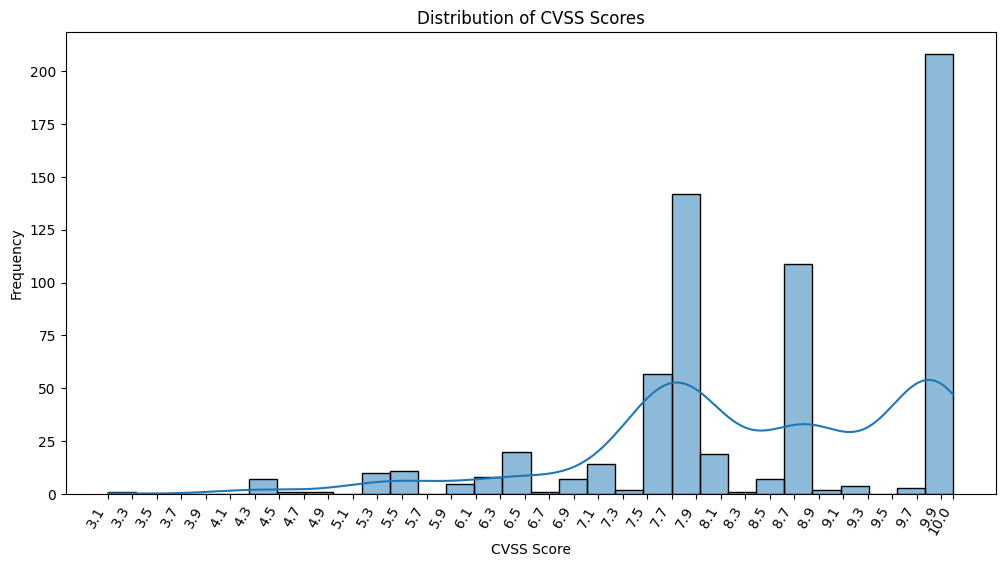

In [403]:
# Creating a plot to show the frequency of CVSS scores

# Create histogram with finer bins
plt.figure(figsize=(12, 6))
sns.histplot(df["cvss"], bins=30, kde=True)

# Set labels
plt.xlabel("CVSS Score")
plt.ylabel("Frequency")
plt.title("Distribution of CVSS Scores")

# Generate tick positions with explicit inclusion of 10.0
tick_positions = [x/10 for x in range(int(df["cvss"].min()*10.0), int(df["cvss"].max()*10.0)+1, 2)]
if 10.0 not in tick_positions:
    tick_positions.append(10.0)  # Ensure 10.0 is included

# Apply custom tick positions and rotation
plt.xticks(ticks=tick_positions, rotation=60, ha='right')

plt.show()

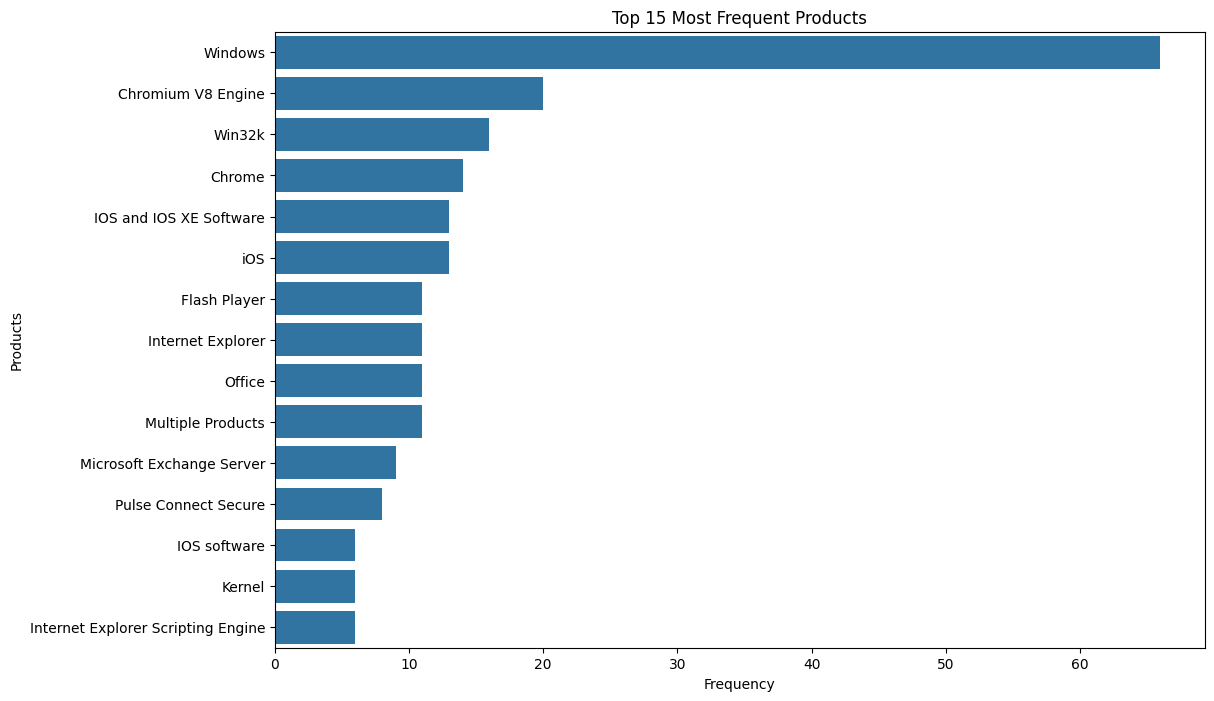

In [404]:
# Creating a plot to show the frequency of Products for the top 15 products
top_products = df["product"].value_counts().nlargest(15)
# finding the top 15 most frequent products

plt.figure(figsize=(12, 8))
sns.barplot(x=top_products.values, y=top_products.index)

plt.xlabel("Frequency")
plt.ylabel("Products")
plt.title("Top 15 Most Frequent Products")

plt.show()


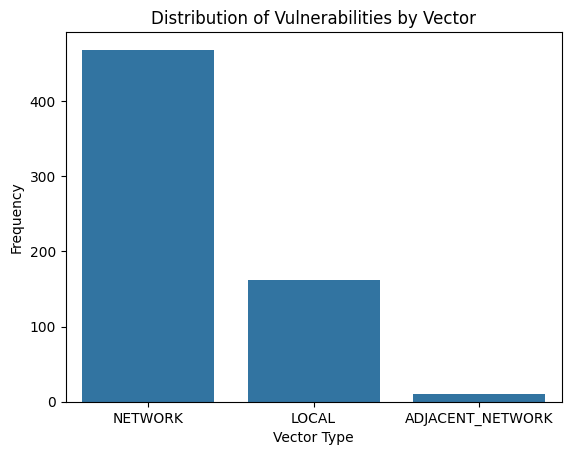

In [405]:
# Creating a plot to show the frequency of Attack vectors

# Count occurrences of each unique value in the 'vector' column
vector_counts = df["vector"].value_counts()

# Plot count of vulnerabilities by vector type
sns.barplot(x=vector_counts.index, y=vector_counts.values)

# Labels and title
plt.xlabel("Vector Type")
plt.ylabel("Frequency")
plt.title("Distribution of Vulnerabilities by Vector")

# Show the plot
plt.show()

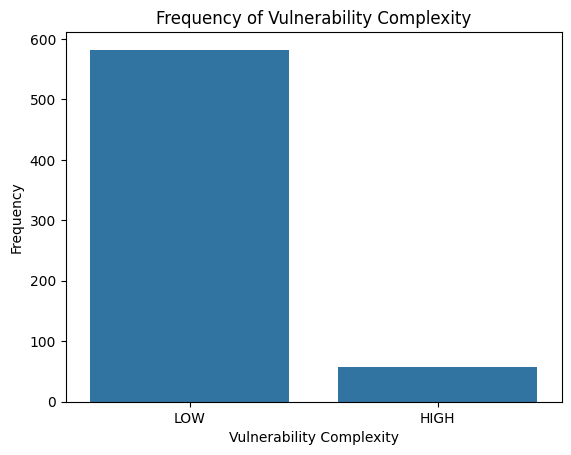

In [406]:
# Creating a plot to show the frequency of Complexities
sns.countplot(x="complexity", data=df_clean)
plt.xlabel("Vulnerability Complexity")
plt.ylabel("Frequency")
plt.title("Frequency of Vulnerability Complexity")
# Show the plot
plt.show()

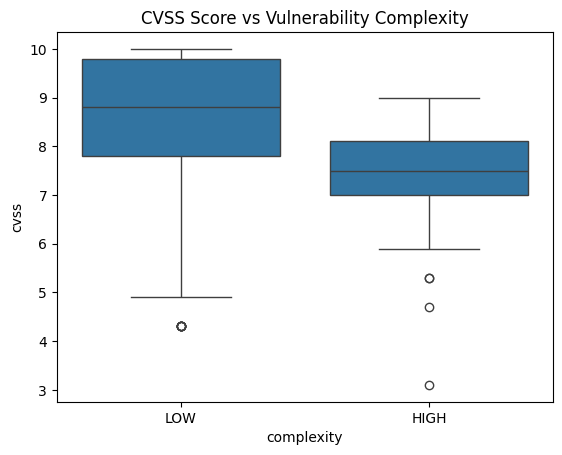

In [407]:
sns.boxplot(data=df, x="complexity", y="cvss")
plt.title("CVSS Score vs Vulnerability Complexity")
plt.show()


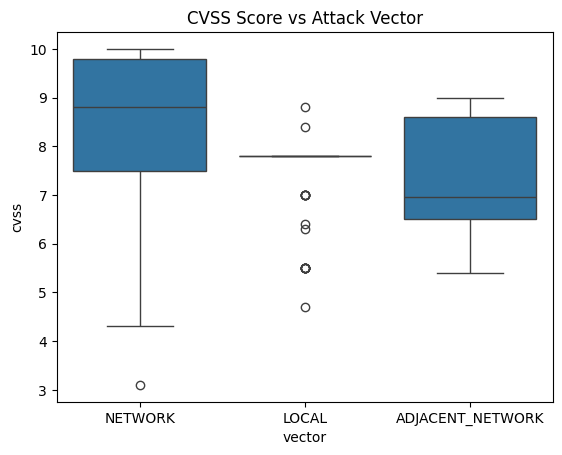

In [408]:
sns.boxplot(data=df, x="vector", y="cvss")
plt.title("CVSS Score vs Attack Vector")
plt.show()

In [409]:
df_encoded = pd.get_dummies(df_clean, columns=["product", "vector", "complexity"], drop_first=True)


In [464]:

# Importing necessary sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

In [411]:
mapping = {"LOW": 1.0, "HIGH": 2.0}
df_clean["complexity"] = df_clean["complexity"].map(mapping)
# using map to change the complexities to numerical values 

C:\Users\ginko\AppData\Local\Temp\ipykernel_12580\3657739970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["complexity"] = df_clean["complexity"].map(mapping)


In [ ]:
#mapping = {"LOW": 1.0, "HIGH": 2.0}
#df_clean["complexity"] = df_clean["complexity"].map(mapping)
# using map to change the vectors to numerical values for further data visualisation

In [412]:
df_clean.head(5)
# checking df_clean again before model training

,product,vector,cvss,complexity
0,FTA,NETWORK,9.8,1.0
1,FTA,LOCAL,7.8,1.0
2,FTA,NETWORK,9.8,1.0
3,FTA,NETWORK,9.8,1.0
4,Acrobat and Reader,NETWORK,8.8,1.0


In [413]:
df_clean.isnull().sum()
# checking again for null values

product       0
vector        0
cvss          0
complexity    0
dtype: int64

In [414]:
print(f"Correlation: {df_clean['cvss'].corr(df_clean['complexity'])}")
print(f"Covariance: {df_clean['cvss'].cov(df_clean['complexity'])}")

Correlation: -0.275429697573292
Covariance: -0.10327171361502346


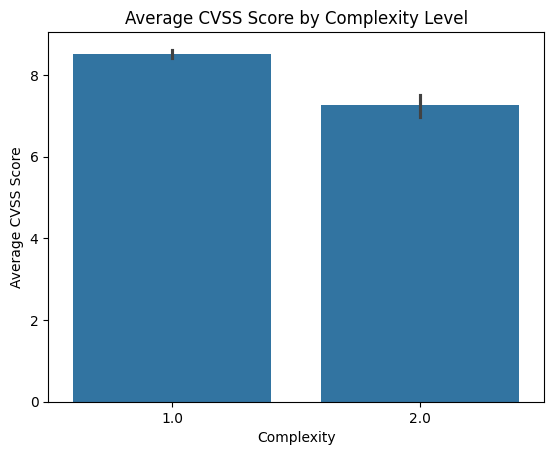

In [437]:
sns.barplot(x='complexity', y='cvss', data=df_clean)
plt.title('Average CVSS Score by Complexity Level')
plt.xlabel('Complexity')
plt.ylabel('Average CVSS Score')
plt.show()
# Where 1.0 is LOW and 2.0 is HIGH complexity
# Forming a plot to learn more about the current CVSS Scores
#this plot also shows the average minimum CVSS scores based on the complexity levels.

In [440]:
X = df_encoded.drop(columns=["cvss"])
y = df_encoded["cvss"]

In [459]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [418]:
# checking datatypes of both x_train and y_train
x_train.dtypes
y_train.dtypes

dtype('float64')

In [465]:
poly = PolynomialFeatures(degree=2)  # Try quadratic terms
X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)

In [466]:
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

LinearRegression()

In [468]:
# Prediction, based on the test data.
y_pred = lr_poly.predict(X_test_poly)
y_pred

array([9.8       , 9.8       , 8.35590643, 8.49333333, 7.5       ,
       9.8       , 7.5       , 8.8       , 8.8       , 9.8       ,
       8.6       , 8.0543358 , 8.1       , 9.8       , 8.49333333,
       7.13333333, 9.8       , 6.42335217, 9.8       , 8.0543358 ,
       9.8       , 9.8       , 7.8       , 8.49333333, 8.6       ,
       8.35590643, 7.68780488, 8.41666667, 7.68780488, 9.8       ,
       7.8       , 7.8       , 9.8       , 8.0543358 , 5.4       ,
       9.8       , 8.0543358 , 8.0543358 , 9.8       , 5.59586899,
       7.68780488, 9.8       , 6.65      , 9.8       , 6.5       ,
       7.8       , 9.8       , 8.8       , 9.8       , 9.8       ,
       9.8       , 9.8       , 7.68780488, 9.8       , 8.65      ,
       8.6       , 8.6       , 9.8       , 8.8       , 6.5       ,
       7.8       , 9.8       , 8.8       , 8.0543358 , 9.35555556,
       8.0543358 , 9.8       , 8.41666667, 9.8       , 8.0543358 ,
       9.8       , 8.0543358 , 8.0543358 , 9.8       , 9.8    

In [469]:
# performing one-hot encoding
df_clean = df_clean.copy()  # Ensure no accidental modifications
df_clean = pd.get_dummies(df_clean, columns=['vector'], drop_first=True)  # One-hot encode 'vector'

KeyError: "None of [Index(['vector'], dtype='object')] are in the [columns]"

In [470]:
# Define Features (X) and Target (y)
X = df_clean.drop(columns=['cvss', 'product'])
y = df_clean['cvss']  # Target variable

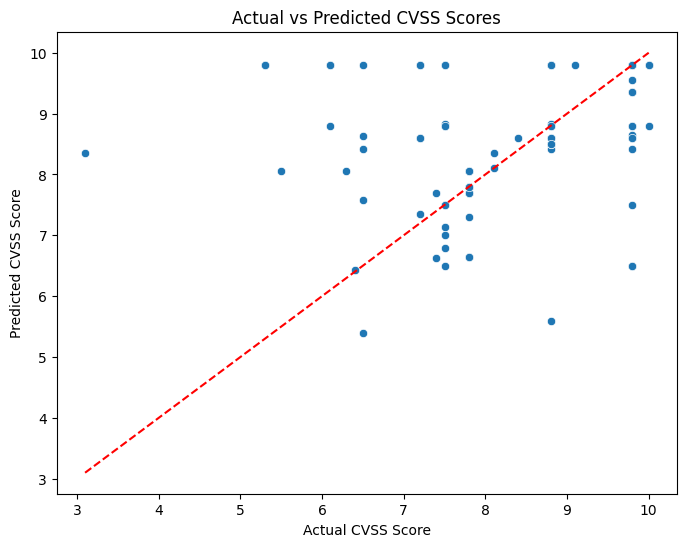

In [471]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual CVSS Score")
plt.ylabel("Predicted CVSS Score")
plt.title("Actual vs Predicted CVSS Scores")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

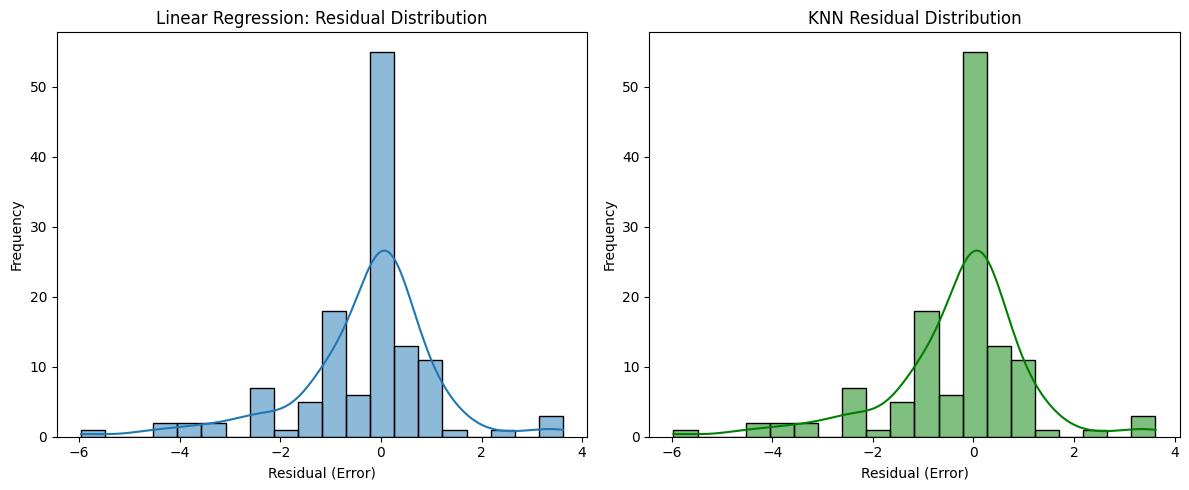

In [424]:
plt.figure(figsize=(12, 5))

# Residual plot for Linear Regression
plt.subplot(1, 2, 1)
sns.histplot(y_test - y_pred, bins=20, kde=True)
plt.xlabel("Residual (Error)")
plt.ylabel("Frequency")
plt.title("Linear Regression: Residual Distribution")

# Residual plot for KNN
plt.subplot(1, 2, 2)
sns.histplot(y_test - y_pred, bins=20, kde=True, color="green")
plt.xlabel("Residual (Error)")
plt.ylabel("Frequency")
plt.title(f"KNN Residual Distribution")

plt.tight_layout()
plt.show()

In [472]:
# Robust Scaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [443]:
knn = KNeighborsRegressor(n_neighbors=25)
# Using n = 25 as it is the closest value to square root 600.

In [444]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=25)

In [473]:
#knn predictions
k_predictions = knn.predict(x_test)
k_predictions

array([8.804, 8.988, 7.392, 8.476, 7.368, 8.552, 7.368, 8.8  , 8.816,
       8.552, 8.936, 7.524, 7.672, 8.552, 8.476, 6.984, 8.552, 7.392,
       8.552, 7.524, 8.552, 8.552, 7.676, 8.476, 8.844, 7.392, 7.616,
       8.48 , 7.616, 8.604, 7.616, 7.524, 8.552, 7.524, 8.304, 8.552,
       7.524, 7.524, 8.632, 7.948, 7.616, 8.552, 7.524, 8.552, 8.58 ,
       7.616, 8.552, 8.816, 8.552, 8.552, 8.712, 8.552, 7.616, 8.552,
       8.612, 8.844, 8.936, 8.552, 8.668, 8.58 , 7.524, 8.552, 8.552,
       7.524, 9.012, 7.524, 8.552, 8.48 , 8.552, 7.524, 8.748, 7.524,
       7.524, 8.936, 8.76 , 7.616, 8.724, 7.48 , 7.524, 8.552, 8.412,
       9.012, 7.524, 8.712, 8.476, 8.844, 8.988, 8.552, 8.552, 8.652,
       8.44 , 7.524, 8.6  , 8.864, 8.936, 8.476, 7.524, 8.48 , 8.648,
       7.616, 8.132, 9.036, 8.028, 8.552, 7.524, 8.8  , 8.864, 8.936,
       8.552, 8.512, 8.464, 7.616, 8.704, 8.552, 8.576, 7.616, 8.524,
       8.552, 8.552, 8.552, 7.616, 7.524, 7.524, 8.552, 8.816, 9.036,
       8.552, 8.552]

In [474]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [477]:
# Evaluate kNN prediction
mae_knn = mean_absolute_error(y_test, knn.predict(x_test))
mse_knn = mean_squared_error(y_test, knn.predict(x_test))
r2_knn = r2_score(y_test, knn.predict(x_test))
# Evaluate Linear Regression prediction
mae_lr = mean_absolute_error(y_test, lr.predict(X_test_scaled))
mse_lr = mean_squared_error(y_test, lr.predict(X_test_scaled))
r2_lr = r2_score(y_test, lr.predict(X_test_scaled))

# Print results
print("kNN Performance:")
print(f"MAE: {mae_knn}, MSE: {mse_knn}, R²: {r2_knn}")

print("\nLinear Regression Performance:")
print(f"MAE: {mae_lr}, MSE: {mse_lr}, R²: {r2_lr}")

kNN Performance:
MAE: 0.9231875, MSE: 1.4059125000000008, R²: 0.18991716813711124

Linear Regression Performance:
MAE: 0.734806868682104, MSE: 1.7656430058732784, R²: -0.017358538498468246


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


##### Based on these results, we will choose to use the prediction from our Linear Regression as our prediction value. It has a lower MAE/MSE value and a higher R2 value compared to the KNN prediction value.

In [431]:
# add data visualisations here with the predictions vs actual

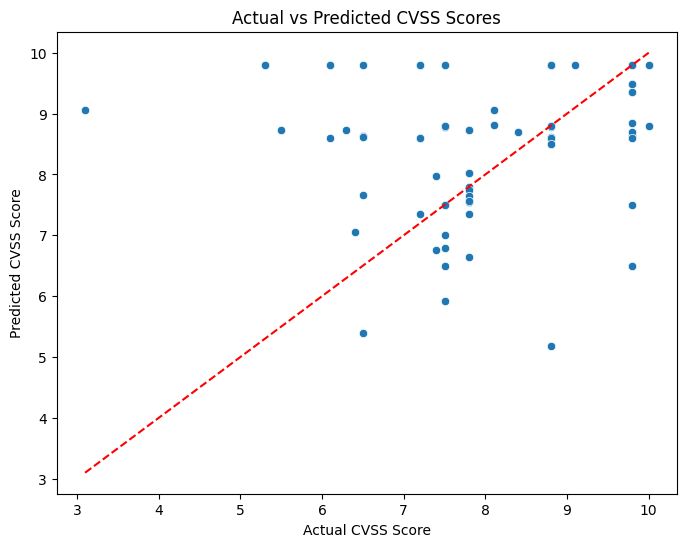

In [432]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual CVSS Score")
plt.ylabel("Predicted CVSS Score")
plt.title("Actual vs Predicted CVSS Scores")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()